# Data Exploration

Source: https://www.kaggle.com/anokas/quora-question-pairs/exploratory-data-analysis

Main parts of the code are from https://www.kaggle.com/anokas with minor alterations.

## Libraries

In [37]:
import numpy as np
import pandas as pd
import os
import gc
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pal = sns.color_palette()

## Dataset size

Training + test dataset combined take around 380 MB. The test dataset is about 5 times larger then the training set.

In [38]:
print('# File sizes')
for file_handle in os.listdir('../input'):
    
    if file_handle.find('csv'):
        file_name = file_handle.ljust(30) 
        file_size_MB = str(round(os.path.getsize('../input/' + file_handle) / 1000000, 2)) + 'MB'
        
        print('{0} {1}'.format(file_name, file_size_MB))

# File sizes
train.csv                      63.4MB
sample_submission.csv          22.35MB
test.csv                       314.02MB


## Training set

In [39]:
train = pd.read_csv('../input/train.csv')
train.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


The training set consists of 2 classes (duplicate and non duplicate questions pairs). 37% of the questions pairs are duplicate which leads to a balanced dataset.

Total number of question pairs for training: 404290
Duplicate pairs: 36.92%
Total number of questions in the training data: 537933
Number of questions that appear multiple times: 111780



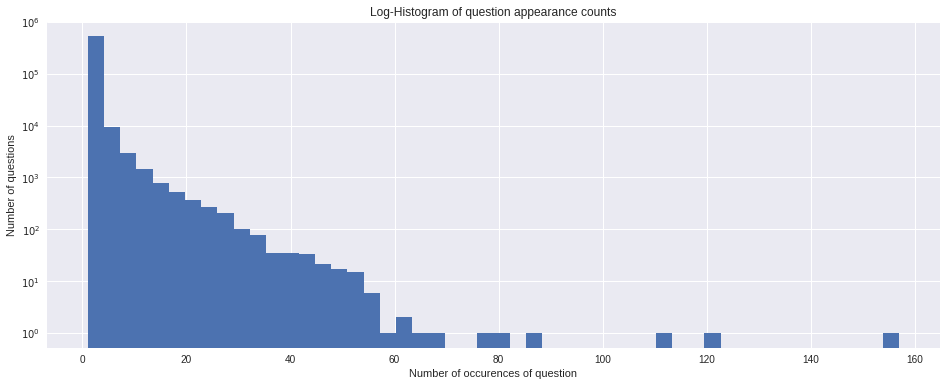

In [40]:
print('Total number of question pairs for training: {}'.format(len(train)))
print('Duplicate pairs: {}%'.format(round(train['is_duplicate'].mean() * 100, 2)))

qids = pd.Series(train['qid1'].tolist() + train['qid2'].tolist())
print('Total number of questions in the training data: {}'.format(len(np.unique(qids))))
print('Number of questions that appear multiple times: {}'.format(np.sum(qids.value_counts() > 1)))

plt.figure(figsize=(16, 6))
plt.hist(qids.value_counts(), bins=50)
plt.yscale('log', nonposy='clip')
plt.title('Log-Histogram of question appearance counts')
plt.xlabel('Number of occurences of question')
plt.ylabel('Number of questions')
print()

## Test set

In [41]:
test = pd.read_csv('../input/test.csv')
test.head()

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?


In [42]:
print('Total number of question pairs for testing: {}'.format(len(test)))

Total number of question pairs for testing: 2345796


## Text analysis

In [60]:
train_qs = pd.Series(train['question1'].tolist() + train['question2'].tolist()).astype(str)
test_qs = pd.Series(test['question1'].tolist() + test['question2'].tolist()).astype(str)

train_qs_char_nums = train_qs.apply(len)
test_qs_char_nums = test_qs.apply(len)

dist_test.head()

0    57
1    66
2    60
3    27
4    32
dtype: int64

mean-train 59.82
std-train 31.96
mean-test 60.07
std-test 31.62
max-train 1169.00
max-test 1176.00


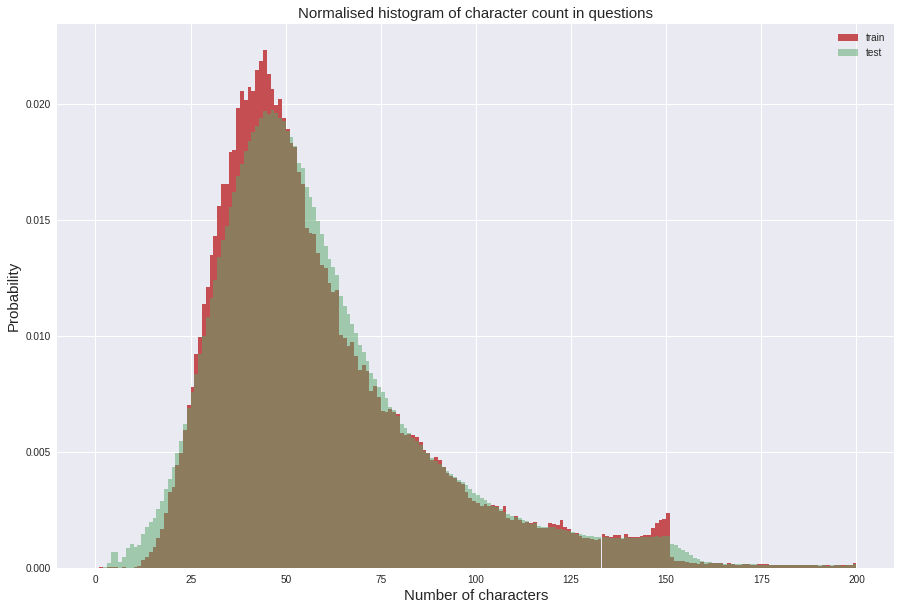

In [61]:
plt.figure(figsize=(15, 10))
plt.hist(train_qs_char_nums, bins=200, range=[0, 200], color=pal[2], normed=True, label='train')
plt.hist(test_qs_char_nums, bins=200, range=[0, 200], color=pal[1], normed=True, alpha=0.5, label='test')
plt.title('Normalised histogram of character count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of characters', fontsize=15)
plt.ylabel('Probability', fontsize=15)

for name, value in zip(
    ['mean-train', 'std-train', 'mean-test', 'std-test', 'max-train', 'max-test'],
    [train_qs_char_nums.mean(), train_qs_char_nums.std(), test_qs_char_nums.mean(),
     test_qs_char_nums.std(), train_qs_char_nums.max(), test_qs_char_nums.max()]
):
    print('{} {:.2f}'.format(name, value))

mean-train 59.82
std-train 31.96
mean-test 60.07
std-test 31.62
max-train 1169.00
max-test 1176.00


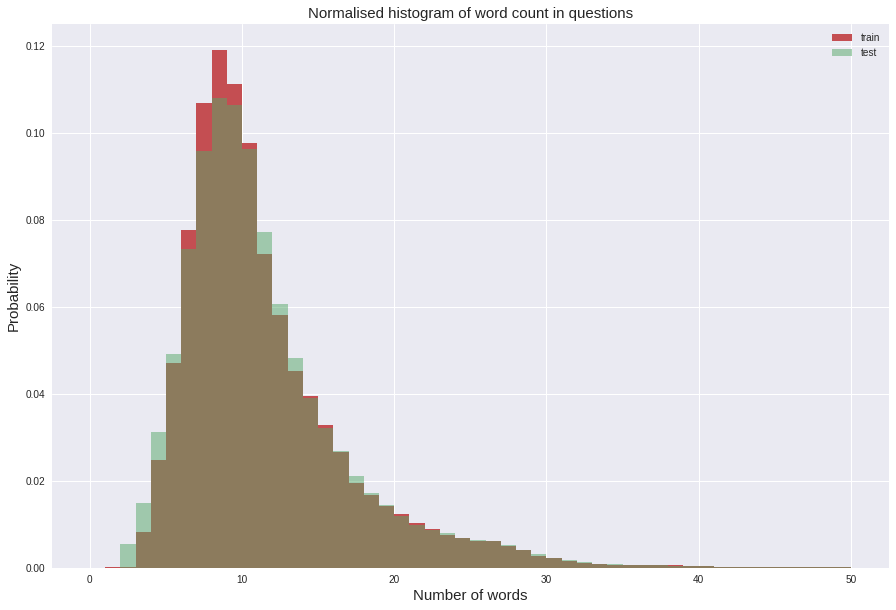

In [63]:
train_qs_word_counts = train_qs.apply(lambda x: len(x.split(' ')))
test_qs_word_counts = test_qs.apply(lambda x: len(x.split(' ')))

plt.figure(figsize=(15, 10))
plt.hist(train_qs_word_counts, bins=50, range=[0, 50], color=pal[2], normed=True, label='train')
plt.hist(test_qs_word_counts, bins=50, range=[0, 50], color=pal[1], normed=True, alpha=0.5, label='test')
plt.title('Normalised histogram of word count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probability', fontsize=15)

for name, value in zip(
    ['mean-train', 'std-train', 'mean-test', 'std-test', 'max-train', 'max-test'],
    [train_qs_char_nums.mean(), train_qs_char_nums.std(), test_qs_char_nums.mean(),
     test_qs_char_nums.std(), train_qs_char_nums.max(), test_qs_char_nums.max()]
):
    print('{} {:.2f}'.format(name, value))

(-0.5, 1439.5, 1079.5, -0.5)

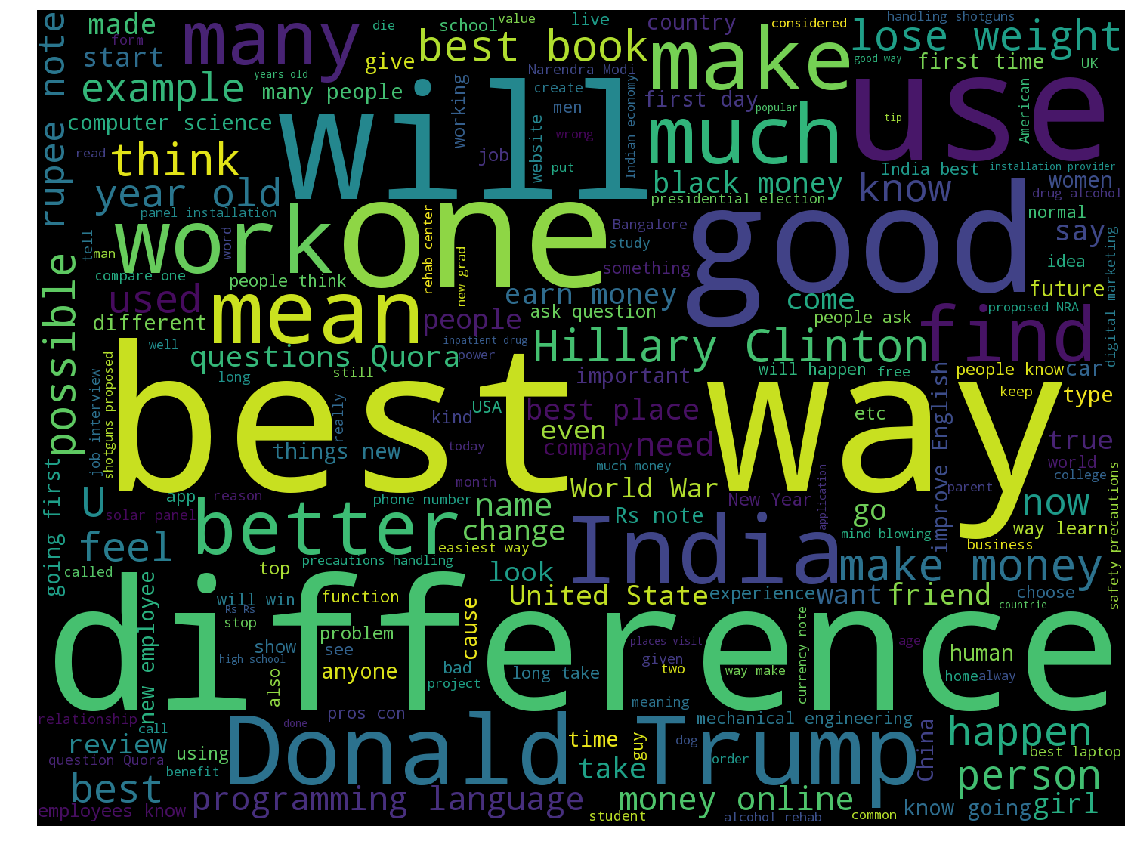

In [65]:
from wordcloud import WordCloud

cloud = WordCloud(width=1440, height=1080).generate(" ".join(train_qs.astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

## Semantic Analysis

In [66]:
qmarks = np.mean(train_qs.apply(lambda x: '?' in x))
math = np.mean(train_qs.apply(lambda x: '[math]' in x))
fullstop = np.mean(train_qs.apply(lambda x: '.' in x))
capital_first = np.mean(train_qs.apply(lambda x: x[0].isupper()))
capitals = np.mean(train_qs.apply(lambda x: max([y.isupper() for y in x])))
numbers = np.mean(train_qs.apply(lambda x: max([y.isdigit() for y in x])))

print('Questions with question marks: {:.2f}%'.format(qmarks * 100))
print('Questions with [math] tags: {:.2f}%'.format(math * 100))
print('Questions with full stops: {:.2f}%'.format(fullstop * 100))
print('Questions with capitalised first letters: {:.2f}%'.format(capital_first * 100))
print('Questions with capital letters: {:.2f}%'.format(capitals * 100))
print('Questions with numbers: {:.2f}%'.format(numbers * 100))

Questions with question marks: 99.87%
Questions with [math] tags: 0.12%
Questions with full stops: 6.31%
Questions with capitalised first letters: 99.81%
Questions with capital letters: 99.95%
Questions with numbers: 11.83%


## Initial Feature Analysis

Here we can see that this feature (word share) has quite a lot of predictive power, as it is good at separating the duplicate questions from the non-duplicate ones. Interestingly, it seems very good at identifying questions which are definitely different, but is not so great at finding questions which are definitely duplicates.

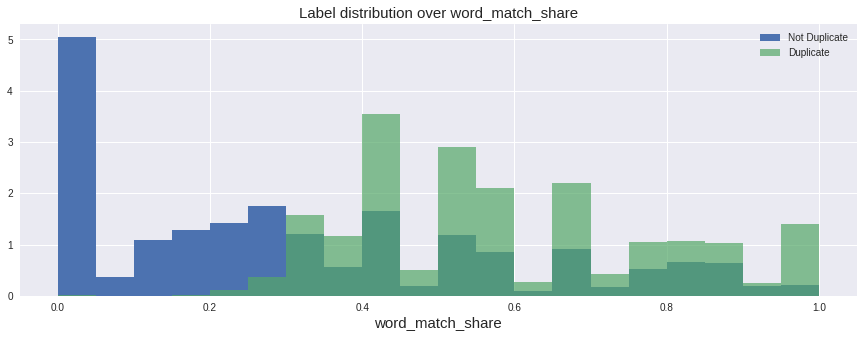

In [74]:
from nltk.corpus import stopwords

stops = set(stopwords.words("english"))

def word_match_share(row):
    q1_words = {}
    q2_words = {}
    
    for word in str(row['question1']).lower().split():
        if word not in stops:
            q1_words[word] = 1
            
    for word in str(row['question2']).lower().split():
        if word not in stops:
            q2_words[word] = 1
            
    if len(q1_words) == 0 or len(q2_words) == 0:
        # The computer-generated chaff includes a few questions that are nothing but stopwords
        return 0
    
    shared_words_in_q1 = [w for w in q1_words.keys() if w in q2_words]
    shared_words_in_q2 = [w for w in q2_words.keys() if w in q1_words]
    R = (len(shared_words_in_q1) + len(shared_words_in_q2)) / (len(q1_words) + len(q2_words))
    return R

plt.figure(figsize=(15, 5))
train_word_match = train.apply(word_match_share, axis=1, raw=True)

plt.hist(train_word_match[train['is_duplicate'] == 0], bins=20, normed=True, label='Not Duplicate')
plt.hist(train_word_match[train['is_duplicate'] == 1], bins=20, normed=True, alpha=0.7, label='Duplicate')

plt.legend()
plt.title('Label distribution over word_match_share', fontsize=15)
plt.xlabel('word_match_share', fontsize=15)

## TF-IDF

In [76]:
from collections import Counter

# If a word appears only once, we ignore it completely (likely a typo)
# Epsilon defines a smoothing constant, which makes the effect of extremely rare words smaller
def get_weight(count, eps=10000, min_count=2):
    if count < min_count:
        return 0
    else:
        return 1 / (count + eps)

eps = 5000 
words = (" ".join(train_qs)).lower().split()
counts = Counter(words)
weights = {word: get_weight(count) for word, count in counts.items()}

In [77]:
print('Most common words and weights: \n')
print(sorted(weights.items(), key=lambda x: x[1] if x[1] > 0 else 9999)[:10])
print('\nLeast common words and weights: ')
(sorted(weights.items(), key=lambda x: x[1], reverse=True)[:10])

Most common words and weights: 

[('the', 2.5891040146646852e-06), ('what', 3.115623919267953e-06), ('is', 3.5861702928825277e-06), ('how', 4.366449945201053e-06), ('i', 4.4805878531263305e-06), ('a', 4.540645588989843e-06), ('to', 4.671434644293609e-06), ('in', 4.884625153865692e-06), ('of', 5.920242493132519e-06), ('do', 6.070908207867897e-06)]

Least common words and weights: 


[('シ', 9.998000399920016e-05),
 ('し?', 9.998000399920016e-05),
 ('19-year-old.', 9.998000399920016e-05),
 ('1-855-425-3768', 9.998000399920016e-05),
 ('confederates', 9.998000399920016e-05),
 ('asahi', 9.998000399920016e-05),
 ('fab', 9.998000399920016e-05),
 ('109?', 9.998000399920016e-05),
 ('samrudi', 9.998000399920016e-05),
 ('fulfill?', 9.998000399920016e-05)]

In [82]:
def tfidf_word_match_share(row):
    q1_words = {}
    q2_words = {}
    
    for word in str(row['question1']).lower().split():
        if word not in stops:
            q1_words[word] = 1
            
    for word in str(row['question2']).lower().split():
        if word not in stops:
            
            q2_words[word] = 1
            
    if len(q1_words) == 0 or len(q2_words) == 0:
        # The computer-generated chaff includes a few questions that are nothing but stopwords
        return 0
    
    shared_weights = [weights[w] for w in q1_words.keys() if w in q2_words] + [
        weights[w] for w in q2_words.keys() if w in q1_words]    
    
    total_weights = [weights[w] for w in q1_words] + [weights[w] for w in q2_words]
    
    R = np.sum(shared_weights) / np.sum(total_weights)
    return R

/home/weenkus/.conda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:24: RuntimeWarning: invalid value encountered in double_scalars


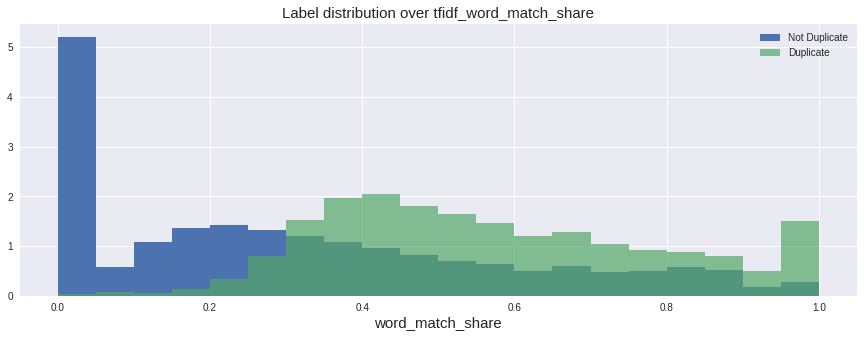

In [85]:
plt.figure(figsize=(15, 5))
tfidf_train_word_match = train.apply(tfidf_word_match_share, axis=1, raw=True)

plt.hist(tfidf_train_word_match[train['is_duplicate'] == 0].fillna(0), bins=20, normed=True, label='Not Duplicate')
plt.hist(tfidf_train_word_match[train['is_duplicate'] == 1].fillna(0), bins=20, normed=True, alpha=0.7, label='Duplicate')

plt.legend()
plt.title('Label distribution over tfidf_word_match_share', fontsize=15)
plt.xlabel('word_match_share', fontsize=15)

In [87]:
from sklearn.metrics import roc_auc_score
print('Original AUC:', roc_auc_score(train['is_duplicate'], train_word_match))
print('   TFIDF AUC:', roc_auc_score(train['is_duplicate'], tfidf_train_word_match.fillna(0)))

Original AUC: 0.780553200628
   TFIDF AUC: 0.77056466105


So it looks like our TF-IDF actually got worse in terms of overall AUC, which is a bit disappointing. (I am using the AUC metric since it is unaffected by scaling and similar, so it is a good metric for testing the predictive power of individual features.

However, I still think that this feature should provide some extra information which is not provided by the original feature. Our next job is to combine these features and use it to make a prediction. For this, I will use our old friend XGBoost to make a classification model.